In [1]:
#importing libraries 

import importlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import codebaseop2 as cb
import test_data as td

In [2]:
def initialize():
    w = np.array([2.,3.])
    b = 20
    n_A = 10
    n_B = 8
    margin = 0.5
    listA,listB = td.TestLinear(w,b,n_A,n_B,margin)
    x = np.vstack((listA, listB))
    y = np.hstack((-np.ones(len(listA)), np.ones(len(listB))))

    return x, y

9999
wstar: [-1.1094012  -1.66409872]


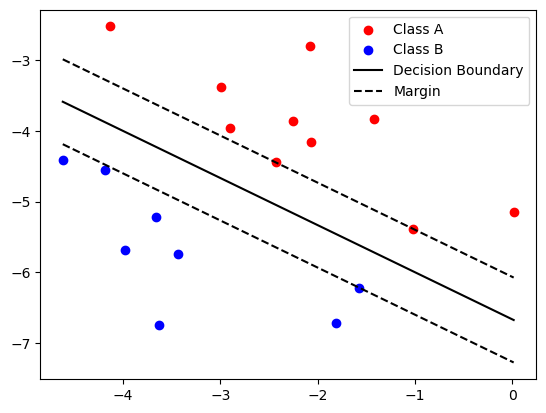

0

In [3]:
def main():
    importlib.reload(cb)
    
    C = 10
    
    datapoints, labels = initialize()
    wstar, bstar = cb.PGDsolver(datapoints, labels, C)

    x_vals = np.linspace(min(datapoints[:, 0]), max(datapoints[:, 0]), 100)
    y_vals = -(wstar[0] * x_vals + bstar) / wstar[1]
    
    
    y_vals_margin1 = y_vals + (1 / wstar[1])  #upper
    y_vals_margin2 = y_vals - (1 / wstar[1])   #lower
    
    print("wstar:", wstar)

    plt.scatter(datapoints[labels == -1][:, 0], datapoints[labels == -1][:, 1], color="r", label="Class A")
    plt.scatter(datapoints[labels == 1][:, 0], datapoints[labels == 1][:, 1], color="b", label="Class B")
    plt.plot(x_vals, y_vals, 'k-', label="Decision Boundary")
    plt.plot(x_vals, y_vals_margin1, 'k--', label="Margin") 
    plt.plot(x_vals, y_vals_margin2, 'k--')  
    plt.legend()  
    plt.show()

    return 0

main()